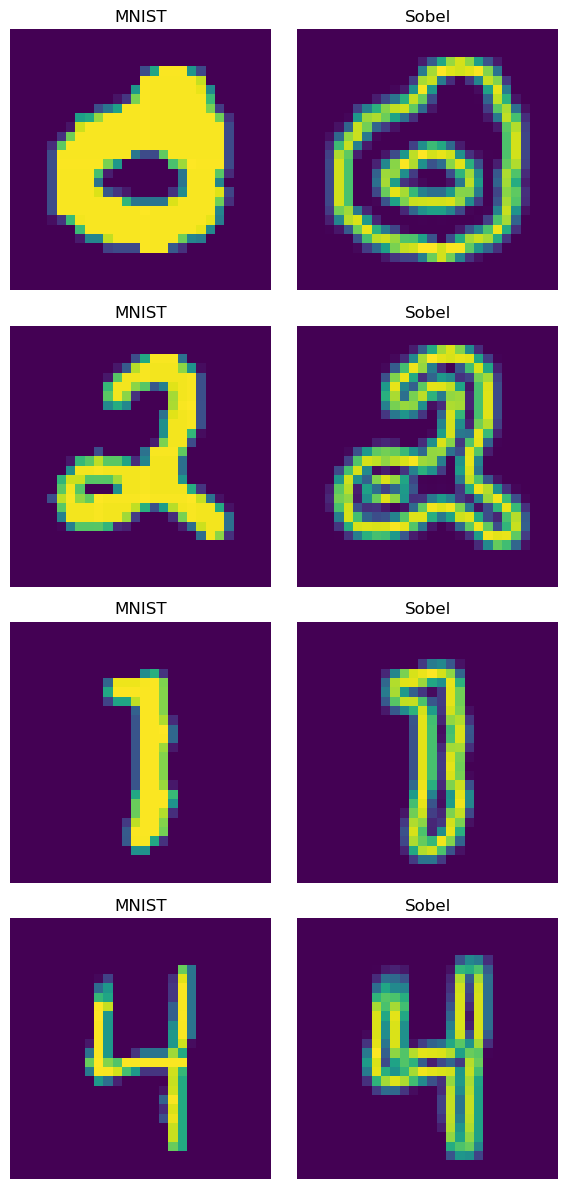

In [39]:
import torch
import matplotlib.pyplot as plt
from torchvision.datasets import MNIST
from torchvision import transforms
from kornia.filters import spatial_gradient

# 加载MNIST数据集
transform = transforms.Compose([
    transforms.ToTensor(),
])
mnist_data = MNIST(root='../data/img', train=True, download=True, transform=transform)

# 获取指定索引的图片
indices = [1999, 213, 3456, 92]
images = [mnist_data[i][0].unsqueeze(0) for i in indices]  # 增加一个维度，以匹配Kornia的输入要求
labels = [mnist_data[i][1] for i in indices]

# 应用Sobel算子
gradients = [spatial_gradient(image) for image in images]
sobel_edges = [torch.sqrt(gradient[:, :, 0]**2 + gradient[:, :, 1]**2) for gradient in gradients]

# 显示原始图像和边缘检测后的图像
fig, axs = plt.subplots(4, 2, figsize=(6, 12))

for i, (image, label, sobel_edge) in enumerate(zip(images, labels, sobel_edges)):
    axs[i, 0].imshow(image[0, 0].detach().numpy(), cmap='viridis')
    axs[i, 0].set_title('MNIST')
    axs[i, 0].axis('off')

    axs[i, 1].imshow(sobel_edge[0, 0].detach().numpy(), cmap='viridis')
    axs[i, 1].set_title('Sobel')
    axs[i, 1].axis('off')

plt.tight_layout()
plt.show()


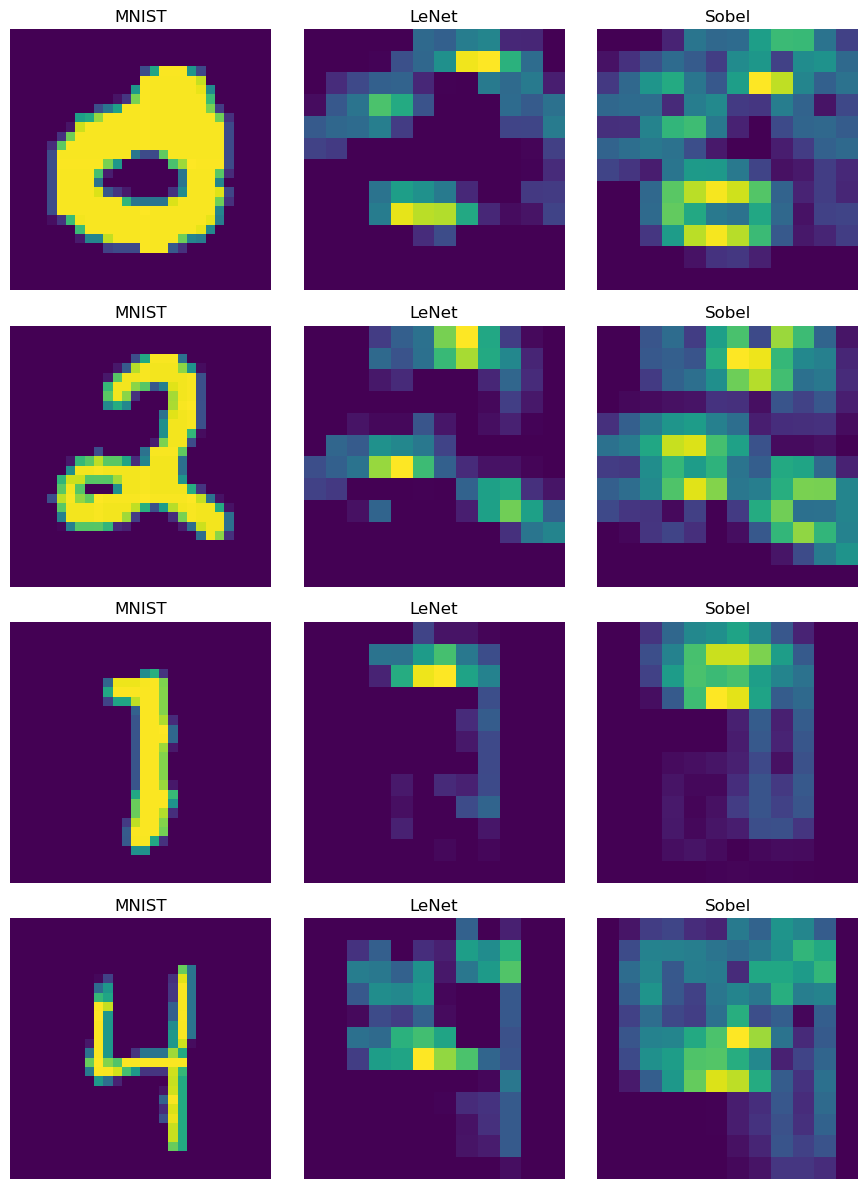

In [40]:
import torch
import matplotlib.pyplot as plt
from torchvision.datasets import MNIST
from torchvision import transforms
from kornia.filters import spatial_gradient
from neural_network import neural_networks

# 加载MNIST数据集
transform = transforms.Compose([
    transforms.ToTensor(),
])
mnist_data = MNIST(root='../data/img', train=True, download=True, transform=transform)

# 获取指定索引的图片
indices = [1999, 213, 3456, 92]
images = [mnist_data[i][0].unsqueeze(0) for i in indices]  # 增加一个维度，以匹配Kornia的输入要求
labels = [mnist_data[i][1] for i in indices]

# 加载和准备LeNet模型
device = torch.device("cpu")
conv_path = "../output/LeNet/LeNet"
net = neural_networks["lenet"](10)
net.load_state_dict(torch.load(conv_path, map_location=device))
net = net.to(device)
net.eval()  # 设置为评估模式

# 获取第一层卷积的输出
def get_conv_output(images):
    with torch.no_grad():  # 跳过梯度计算
        output = net.conv1(images)  # 假设LeNet模型结构中conv1是第一层卷积
        return output

conv_outputs = [get_conv_output(image) for image in images]

# 应用Sobel算子
def apply_sobel(conv_output):
    gradient = spatial_gradient(conv_output)
    sobel_edge = torch.sqrt(gradient[:, :, 0]**2 + gradient[:, :, 1]**2)
    return sobel_edge

sobel_edges = [apply_sobel(output) for output in conv_outputs]

# 显示原始图像、LeNet第一层卷积的输出以及应用Sobel算子后的结果
fig, axs = plt.subplots(4, 3, figsize=(9, 12))

for i, (image, conv_output, sobel_edge) in enumerate(zip(images, conv_outputs, sobel_edges)):
    axs[i, 0].imshow(image[0, 0].detach().numpy(), cmap='viridis')
    axs[i, 0].set_title('MNIST')
    axs[i, 0].axis('off')

    axs[i, 1].imshow(conv_output[0, 0].detach().numpy(), cmap='viridis')
    axs[i, 1].set_title('LeNet')
    axs[i, 1].axis('off')

    axs[i, 2].imshow(sobel_edge[0, 0].detach().numpy(), cmap='viridis')
    axs[i, 2].set_title('Sobel')
    axs[i, 2].axis('off')

plt.tight_layout()
plt.show()
